<a href="https://colab.research.google.com/github/TAUforPython/nonlinear_phasepicture/blob/economics-volterra/%D0%B2%D1%8B%D0%BD%D1%83%D0%B6%D0%B4%D0%B5%D0%BD%D0%BD%D0%BE%D0%B5_%D0%B4%D0%B2%D0%B8%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5_%D0%BD%D0%B5%D0%BB%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D1%8B%D1%85_%D1%81%D0%B8%D1%81%D1%82%D0%B5%D0%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# загружаем библиотеки
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [2]:
#определяем статическую характеристику нелинейного элемента
def rele(xNL,dxNL,C,b,m):
  if xNL > 0:
    yNL = C
  else:
    yNL = -C
  return yNL

In [3]:
# задаем внешнее управляющее воздействие
def u_contol(t):
    u = 0.1*np.sin(0.2*2*np.pi*t)
    return u

In [5]:
#задаем систему дифференциальных уравнений в форме Коши и вынужденное движение!
# The second order differential equation for the angle `theta` of a
# pendulum acted on by gravity with friction
# theta''(t) + a*theta'(t) + b*sin(theta(t)) = 0
def ode(y, t, a, b, c, d):
        theta, omega = y
        dydt = [omega, -a * omega - b * theta  +  c*rele(theta, omega, 1, 0, 0) + d*u_contol(t)]
        return dydt

In [14]:
def ode(z, t, a, b, c, d):
        x, y = z
        #уравнение Лотки-Вольтерра (идеальный случай)
        #dzdt = [a*x - b*x*y, -c*y + d*x*y]
        #уравнение Лотки-Вольтерра (логистическая кривая)
        #добавляем гармоническую составляющую
        dzdt = [a*(1 - x/2)*x - b*x*y - 0.05*np.sin(2*np.pi*t), -c*y + d*x*y + 0*np.cos(2*np.pi*t)]
        return dzdt

In [15]:
def DyD2y(t,y):
          h = (t[np.size(t) - 1] - t[0]) / np.size(t)
          kernel_1 = np.array([1, -1])
          dy = np.convolve(kernel_1, y, mode='valid')/h
          dy = np.insert(dy,0,dy[0])
          return dy

In [16]:
#задаем функцию численного решения дифференциального уравнения
def calcODE(args, y0, dy0, ts, nt):
    y0 = [y0, dy0]
    t = np.linspace(0, ts, nt)
    sol = odeint(ode, y0, t, args)
    return sol

In [17]:
#задаем функцию отрисовки фазового портрета в зависимости от начальных условий
def drawPhasePortrait(args, initcond, ts, nt):
    deltaX, deltaDX, startX, stopX, startDX, stopDX = initcond
    plt.figure(figsize=(10,10))
    for y0 in range(startX, stopX, deltaX):
            for dy0 in range(startDX, stopDX, deltaDX):
                sol = calcODE(args, y0, dy0, ts, nt)
                plt.plot(sol[:, 0], sol[:, 1], 'b')
                plt.plot(sol[0, 0], sol[0, 1], 'o') #изображаем начальные условия
    plt.xlabel('x = $x_1$')
    plt.ylabel('dx/dt = $x_2$')
    plt.grid()
    plt.show()

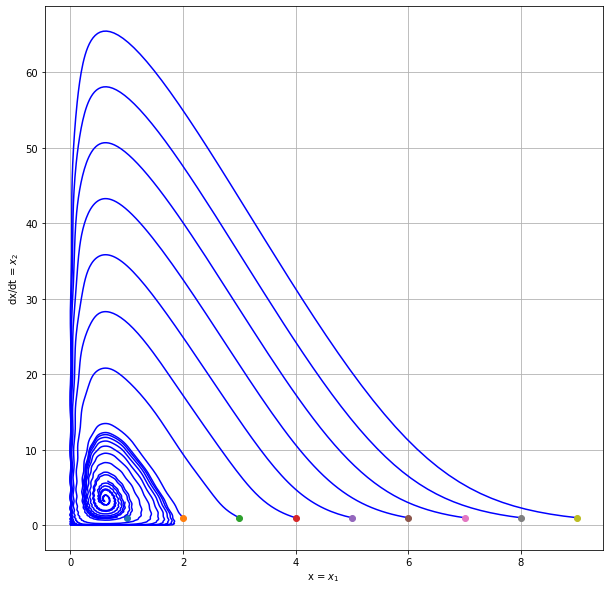

In [24]:
#задаем параметры системы и начальные условия
a = 0.25 #темп производства (сравни с темпом оттока покупателей)
p = 0.95 #вероятность, что товар купят 
b = (1 - p) 
c = 0.5 #темп оттока покупателей, когда товара нет - они уходят
d = 0.8 #вероятность того, что за товаров вернуться и купят заново 
args = (a, b, c, d)
Tend = 60

# начальные условия для модели маятника 
#a = 0.25
#b = 5
#c = 1
#d = 1
#args = (a, b, c, d)

#deltaX, deltaDX, startX, stopX, startDX, stopDX = initcond
initcond = (1, 1, 1, 10, 1, 2)
drawPhasePortrait(args, initcond, ts = Tend, nt = 2000)

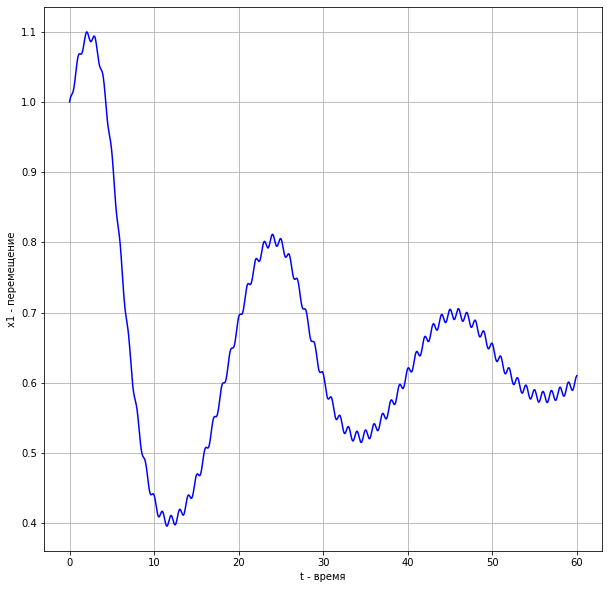

In [25]:
sol = calcODE(args, y0 = 1, dy0 = 1, ts = Tend, nt = 2000)
t = np.linspace(0, Tend, 2000)
plt.figure(figsize=(10,10))
plt.xlabel('t - время')
plt.ylabel('x1 - перемещение')
plt.plot(t, sol[:, 0], 'b')
#plt.plot(t, sol[:, 1], 'r')
#plt.plot(t, u_contol(t), 'r')
plt.grid()
plt.show()

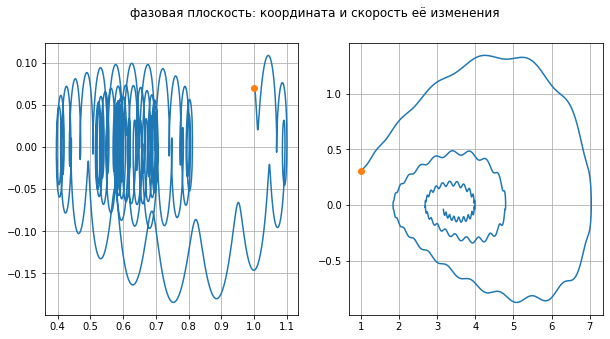

In [26]:
# фазовая плоскость 
dxdt0 = DyD2y(t,sol[:, 0])
dxdt1 = DyD2y(t,sol[:, 1])

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(10,5)
fig.suptitle('фазовая плоскость: координата и скорость её изменения')
ax1.plot(sol[:, 0], dxdt0)
ax1.plot(sol[0, 0], dxdt0[0],'o') #изображаем начальные условия
ax1.grid()
ax2.plot(sol[:, 1], dxdt1)
ax2.plot(sol[0, 1], dxdt1[0],'o') #изображаем начальные условия
ax2.grid()


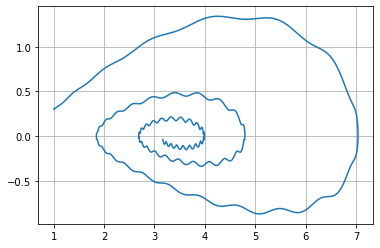

In [27]:
dxdt = DyD2y(t,sol[:, 1])
plt.plot(sol[:, 1], dxdt)
plt.grid()
plt.show()

# New Section

In [28]:
np.savetxt("buffervar.csv", sol, delimiter=",")